In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets,interact
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
import math
import pandas as pd

In [2]:
class Sigmoidplot:
    def __init__(self,a,b):
        self.w=a
        self.b=b
    def model(self,x):
        '''
        Sigmoid model
        '''
        return 1/(1+np.exp(-(np.sum(np.dot(self.w,x))+self.b)))
    
    def Plot(self):
        interact(self.intereactsigmoid,w=widgets.FloatSlider(min=-10,max=10,step=0.2),b=widgets.FloatSlider(min=-10,max=10,step=0.2));
    
    def intereactsigmoid(self,w,b):
        self.w=w
        self.b=b
        y=[]
        X=np.linspace(-10,10,100)
        for x in X:
            y.append(self.model(x))
        plt.plot(X,y)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()
    

In [3]:
sigmoid=Sigmoidplot(1,2)
sigmoid.Plot()

interactive(children=(FloatSlider(value=0.0, description='w', max=10.0, min=-10.0, step=0.2), FloatSlider(valu…

In [4]:
class sigmoid_neuron:
    
    def __init__(self):
        self.w=None
        self.b=None
    
    def model(self,x):
        '''
        Sigmoid model
        x->input array of shape (1,n)
        n is number of Fearture
        '''
        return 1/(1+np.exp(-(np.sum(np.dot(self.w,x))+self.b)))
    
    def loss(self,x,y):
        return (self.model(x)-y)**2

    def grad_w(self,x,y):
        '''
        Partial derivative of Loss function w.r.t (w1,w2,w3,..) i.e number of fearture for ith data.
        This function calculate gradient for w1,w2,...wn for input array of shape (1,n) 
        it return vector of size(1,n)
        '''
        y_pred=self.model(x)
        return (y_pred-y) * y_pred* (1-y_pred) * x
    
    def grad_b(self,x,y):
        y_pred=self.model(x)
        return (y_pred-y) * y_pred* (1-y_pred)
    
    def plot_loss(self):
        plt.plot(range(len(self.loss_num)),self.loss_num)
        plt.show()
        
    def predict(self,X):
        Y=[]
        for x in X:
            result=self.model(x)
            #for classification threshold=0.4 as
            if result>0.4:
                Y.append(1)
            else:
                Y.append(0)
        return Y
            
    def fit(self,X,Y,epochs=1,lr=1):
        '''
        X->training input data
        Y->Output Labels
        lr->learning rate
        epochs->number of iteration
        '''
        self.w=np.random.randn(1,X.shape[1])
        self.b=0
        self.loss_num=[]
        for i in range(epochs):
            dw=0
            db=0
            loss=0
            for x,y in zip(X,Y):
                #calculate sum of partial derivative of loss w.r.t w1,w2,...,wn
                loss+=self.loss(x,y)
                dw=dw+self.grad_w(x,y)
                db=db+self.grad_b(x,y)
            self.loss_num.append(loss)
            self.w=self.w-lr*dw
            self.b=self.b-lr*db        

In [5]:
s=sigmoid_neuron()
data=load_breast_cancer()
X=data["data"]
Y=data["target"]
standardization=StandardScaler() # standardize data as result get overflow cause learning problem
X=standardization.fit_transform(X)
# select best 
selectbest=SelectKBest(k=2)
X=selectbest.fit_transform(X,Y)
data1=pd.DataFrame(X)
data1["class"]=Y

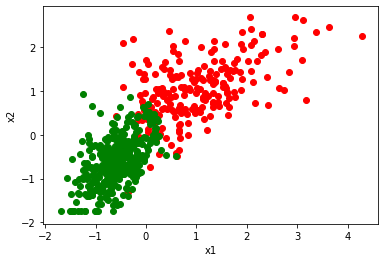

In [6]:
for i,c in zip(range(2),["red","green"]):
    x1=data1[data1['class']==i].iloc[:,0]
    x2=data1[data1['class']==i].iloc[:,1]
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.scatter(x1,x2,color=c)
plt.show()

# Data can be seperable by sigmoid neuron let's code it

In [7]:
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.25,random_state=1)
s.fit(X_train,y_train,epochs=500,lr=0.001)

In [8]:
Y_pred=s.predict(X_test)

In [9]:
print("Accuracy is ",accuracy_score(y_test,Y_pred))
print("RMSE is",math.sqrt(mean_squared_error(y_test,Y_pred)))

Accuracy is  0.9300699300699301
RMSE is 0.26444294267397256


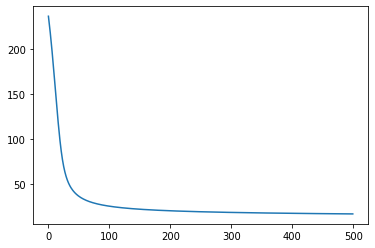

In [10]:
#plot ith iteration vs loss
s.plot_loss()

In [11]:
print(Y_pred)

[1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]


In [12]:
print("weight",s.w,"Bias",s.b)

weight [[-1.6776685  -1.92786744]] Bias 0.749248249376996


# From above observation weights are negative and biase is positive so sigmoid slope is negative as we see in following figure that obtaine from above Sigmoidplot class written top of this jupyter notebook
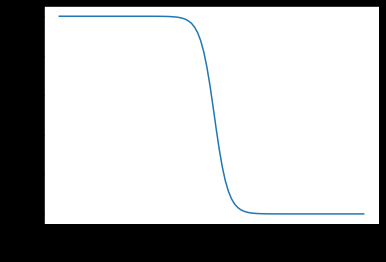